DIgital Image Processing Fundamentals

0. Introduction
Images are NumPy’s arrays np.ndarray

image: np.ndarray 
pixels: array values: a[2, 3] 
channels:array dimensions 
image encoding: dtype (np.uint8, np.uint16, np.float) 
filters: functions (numpy, skimage, scipy)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
from skimage import data

In [3]:
def display_image_in_actual_size(im):

    dpi = mpl.rcParams['figure.dpi']
    #im_data = plt.imread(im_path)
    height, width= im.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im, cmap='gray')

    plt.show()


# Scaling gray level image

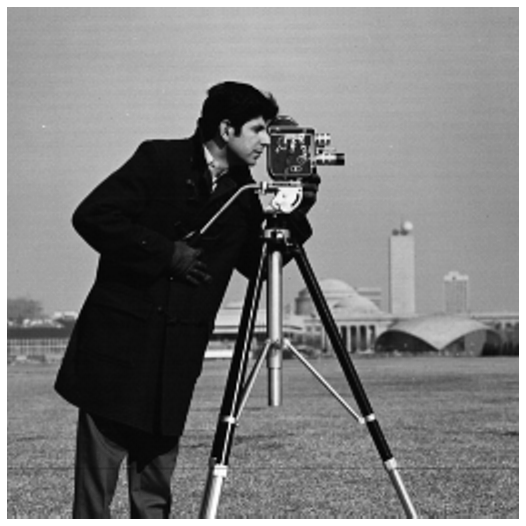

In [9]:
cam = data.camera()
(x,y)=cam.shape
oi = cam.copy()
scale=0.64
inv_scale = 1/scale
(ix, iy)= (int(x*scale), int(y*scale))
int_image=np.zeros((ix, iy), dtype="uint8")

for i in np.arange(ix-1):
    row = i*inv_scale
    irow = int(row)
    a = row - irow
    for j in np.arange(iy-1):
        col = j*inv_scale
        icol = int(col)
        b = col - icol
        int_image[i, j] = (oi[irow,icol]*(1-a)*(1-b) + oi[irow,icol+1]*a*(1-b) + oi[irow+1,icol]*(1-a)*b + oi[irow+1,icol+1]*a*b).astype("uint8")
#plt.imshow(oi, cmap=plt.cm.gray)
#plt.imshow(int_image, cmap=plt.cm.gray)
#plt.show()
display_image_in_actual_size(oi)
